# Wine Clustering Project
## In This Project we Will Use UnSupervised learning techniques to group the similar types of wine together.  
### Clustering Techniques:
<ul>
  <li>K-Means</li>
  <li>DBSCAN</li>
</ul>
<br>
<p>
This dataset is adapted from the Wine Data Set from <strong><a>https://archive.ics.uci.edu/ml/datasets/wine</a></strong> by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline
<br>
</p>
<img src="https://media.winefolly.com/whole-cluster-fermentation-destemmed-illustration-winefolly.png" alt="Wine" width=600/>

# Import Libraries

In [180]:
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from summarytools import dfSummary
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
import yellowbrick
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Load Wine Dataset

In [2]:
wine_df = pd.read_csv('wine-clustering.csv')

In [3]:
wine_df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

# Feature Engineering and EDA

## Get Information about wine data

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
dfSummary(wine_df)

In [6]:
pd.DataFrame(wine_df.aggregate(['min', 'mean', 'std', 'max']).to_dict())

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
min   11.030000    0.740000  1.360000     10.600000   70.000000   
mean  13.000618    2.336348  2.366517     19.494944   99.741573   
std    0.811827    1.117146  0.274344      3.339564   14.282484   
max   14.830000    5.800000  3.230000     30.000000  162.000000   

      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
min        0.980000    0.340000              0.130000         0.410000   
mean       2.295112    2.029270              0.361854         1.590899   
std        0.625851    0.998859              0.124453         0.572359   
max        3.880000    5.080000              0.660000         3.580000   

      Color_Intensity       Hue     OD280      Proline  
min          1.280000  0.480000  1.270000   278.000000  
mean         5.058090  0.957449  2.611685   746.893258  
std          2.318286  0.228572  0.709990   314.907474  
max         13.000000  1.710000  4.000000  1680.000000

## Visualization

### Visualize Columns Distribution

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

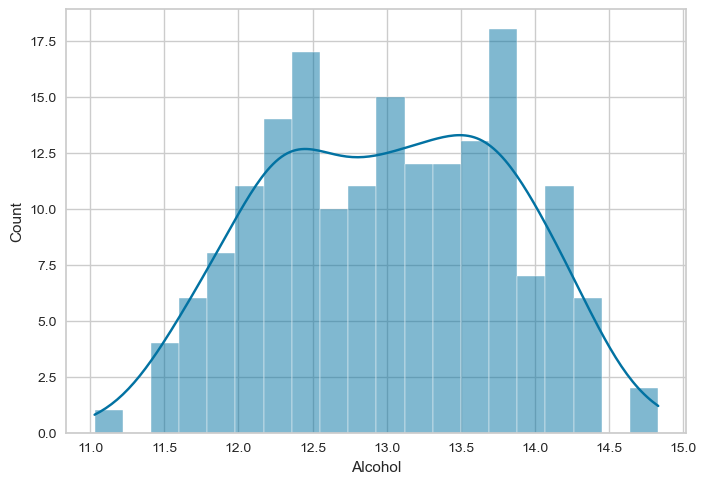

In [7]:
sns.histplot(wine_df.Alcohol, bins=20, kde=True)

<AxesSubplot:xlabel='Malic_Acid', ylabel='Count'>

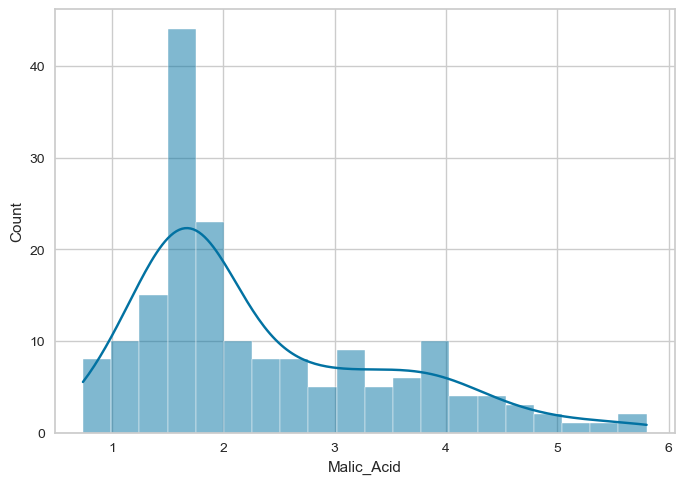

In [8]:
sns.histplot(wine_df.Malic_Acid, bins=20, kde=True)

<AxesSubplot:xlabel='Ash', ylabel='Count'>

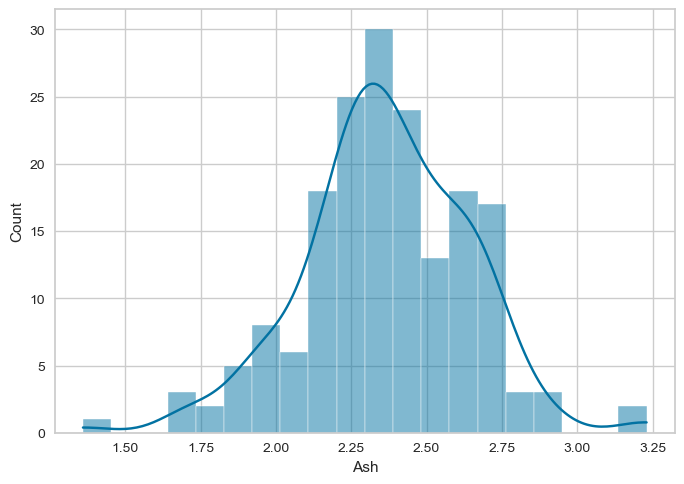

In [9]:
sns.histplot(wine_df.Ash, bins=20, kde=True)

<AxesSubplot:xlabel='Ash_Alcanity', ylabel='Count'>

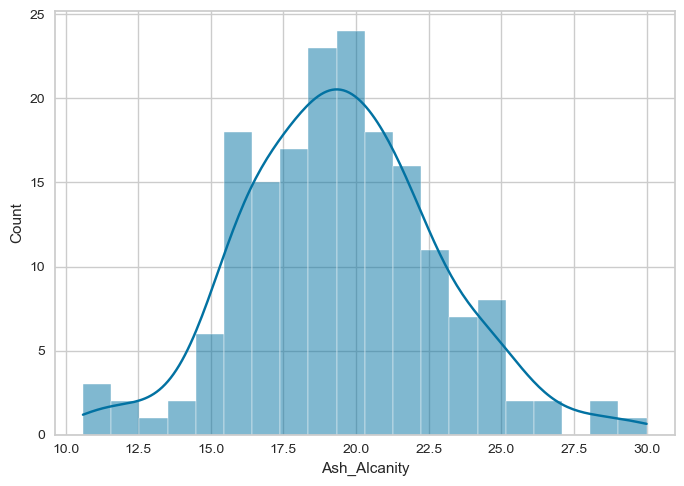

In [10]:
sns.histplot(wine_df.Ash_Alcanity, bins=20, kde=True)

<AxesSubplot:xlabel='Magnesium', ylabel='Count'>

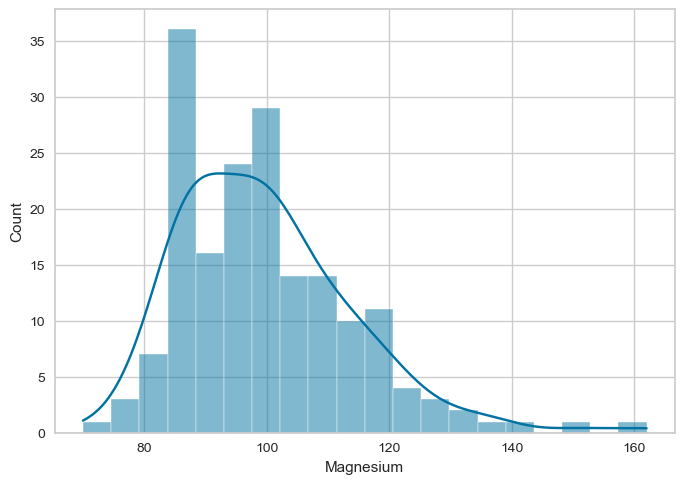

In [11]:
sns.histplot(wine_df.Magnesium, bins=20, kde=True)

<AxesSubplot:xlabel='Total_Phenols', ylabel='Count'>

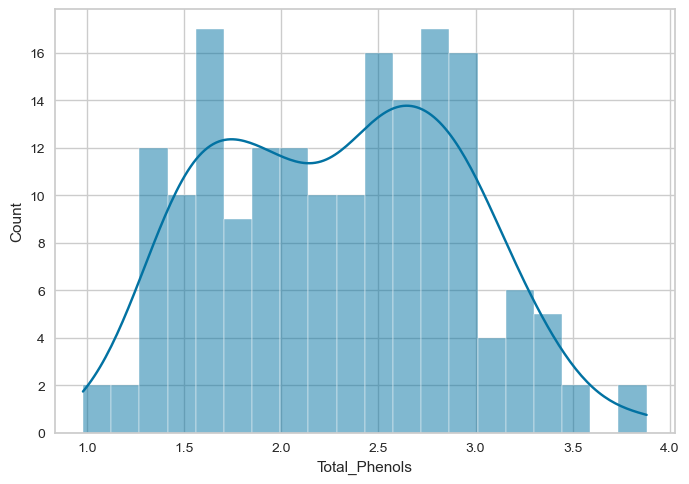

In [12]:
sns.histplot(wine_df.Total_Phenols, bins=20, kde=True)

<AxesSubplot:xlabel='Flavanoids', ylabel='Count'>

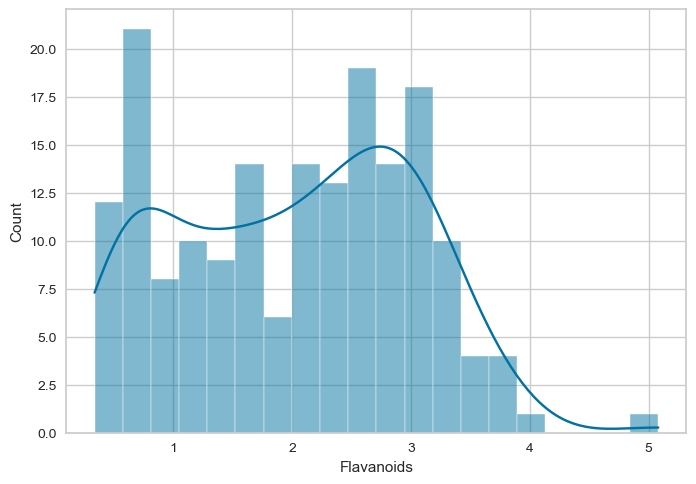

In [13]:
sns.histplot(wine_df.Flavanoids, bins=20, kde=True)

<AxesSubplot:xlabel='Nonflavanoid_Phenols', ylabel='Count'>

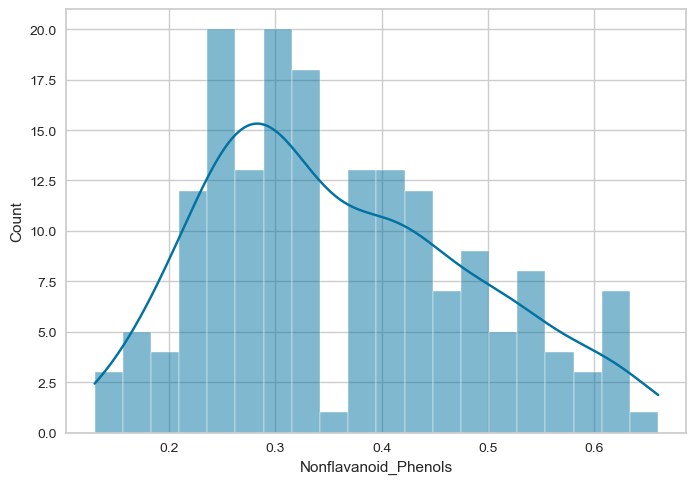

In [14]:
sns.histplot(wine_df.Nonflavanoid_Phenols, bins=20, kde=True)

<AxesSubplot:xlabel='Proanthocyanins', ylabel='Count'>

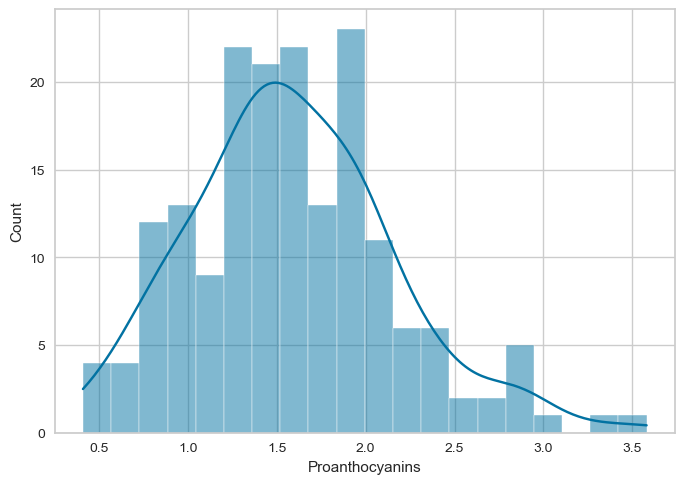

In [15]:
sns.histplot(wine_df.Proanthocyanins, bins=20, kde=True)

<AxesSubplot:xlabel='Color_Intensity', ylabel='Count'>

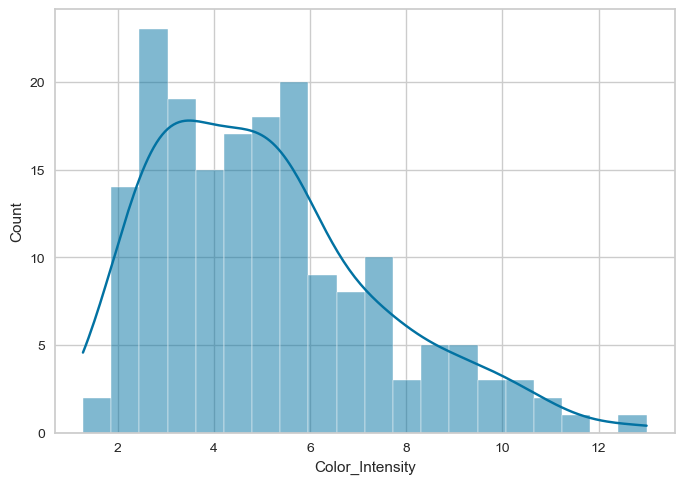

In [16]:
sns.histplot(wine_df.Color_Intensity, bins=20, kde=True)

<AxesSubplot:xlabel='Hue', ylabel='Count'>

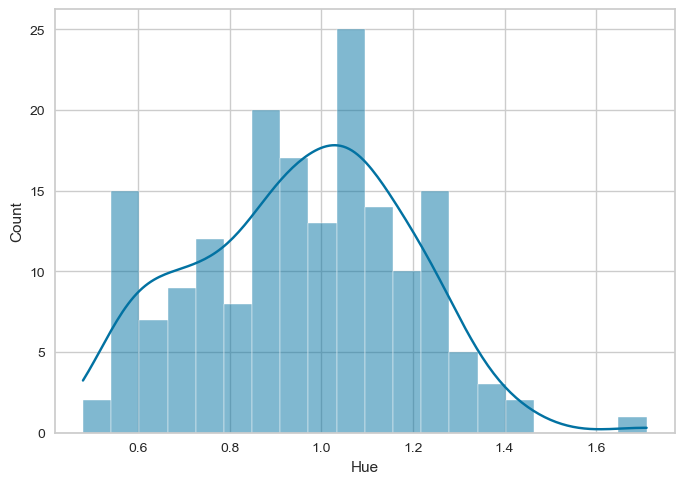

In [17]:
sns.histplot(wine_df.Hue, bins=20, kde=True)

<AxesSubplot:xlabel='OD280', ylabel='Count'>

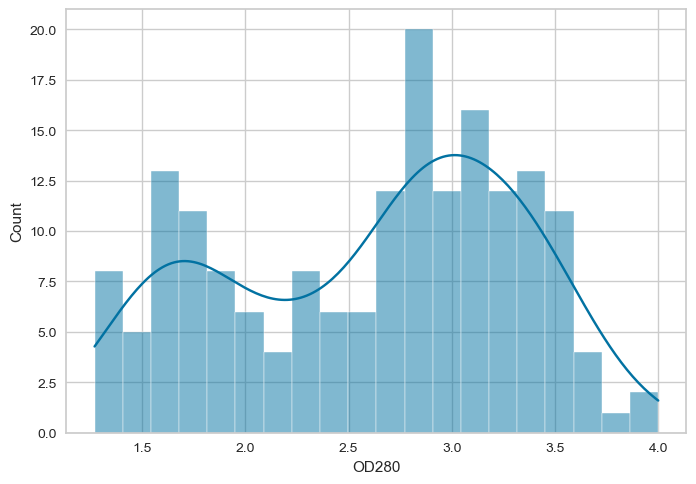

In [18]:
sns.histplot(wine_df.OD280, bins=20, kde=True)

<AxesSubplot:xlabel='Proline', ylabel='Count'>

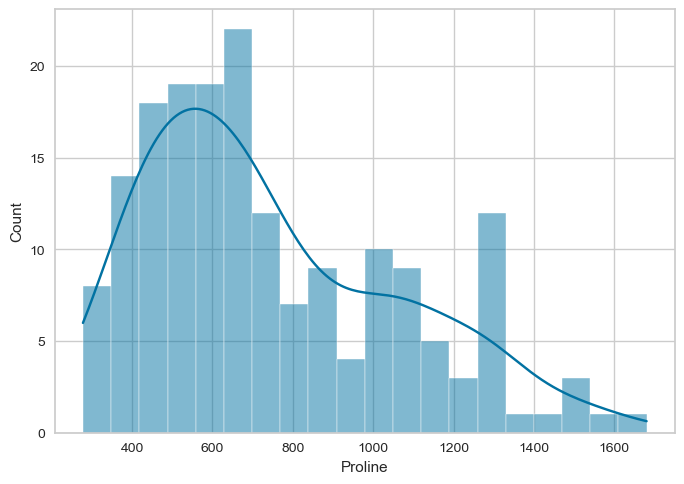

In [19]:
sns.histplot(wine_df.Proline, bins=20, kde=True)

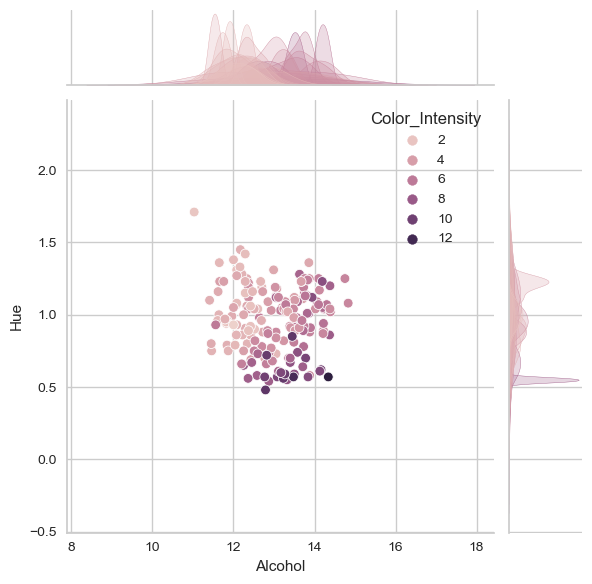

In [20]:
sns.jointplot(x=wine_df.Alcohol, y=wine_df.Hue, kind='scatter', hue=wine_df.Color_Intensity)

## Scale Data Using Standard Scaler

In [21]:
standard_scaler = StandardScaler()
wine = standard_scaler.fit_transform(wine_df)
wine_df_scaled = pd.DataFrame(wine, columns=wine_df.columns)

In [22]:
dfSummary(wine_df_scaled)

In [23]:
pd.DataFrame(wine_df.aggregate(['min', 'mean', 'std', 'max']).to_dict())

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
min   11.030000    0.740000  1.360000     10.600000   70.000000   
mean  13.000618    2.336348  2.366517     19.494944   99.741573   
std    0.811827    1.117146  0.274344      3.339564   14.282484   
max   14.830000    5.800000  3.230000     30.000000  162.000000   

      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
min        0.980000    0.340000              0.130000         0.410000   
mean       2.295112    2.029270              0.361854         1.590899   
std        0.625851    0.998859              0.124453         0.572359   
max        3.880000    5.080000              0.660000         3.580000   

      Color_Intensity       Hue     OD280      Proline  
min          1.280000  0.480000  1.270000   278.000000  
mean         5.058090  0.957449  2.611685   746.893258  
std          2.318286  0.228572  0.709990   314.907474  
max         13.000000  1.710000  4.000000  1680.000000

### Plot Data In 2D Plot using PCA

In [24]:
pca_2d = PCA(n_components=2, random_state=42)

In [25]:
two_dimentional_feat = pca_2d.fit_transform(wine)
feat_1, feat_2 = two_dimentional_feat[:, 0], two_dimentional_feat[:, 1] 

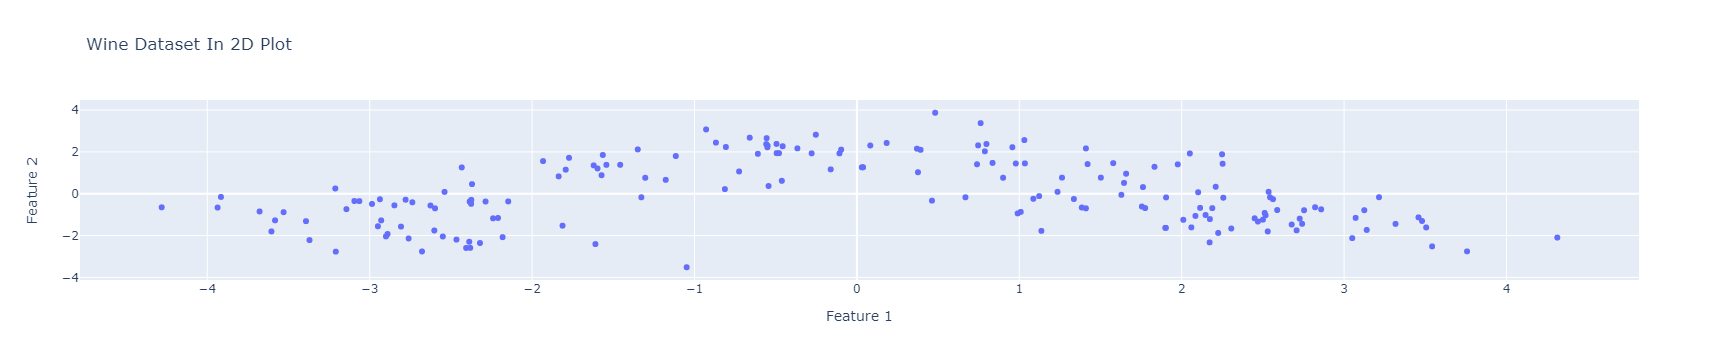

In [26]:
fig = px.scatter(
    x=feat_1,
    y=feat_2,
    title="Wine Dataset In 2D Plot"
).update_layout(
    xaxis_title='Feature 1',
    yaxis_title='Feature 2'
)
fig.show()

<AxesSubplot:>

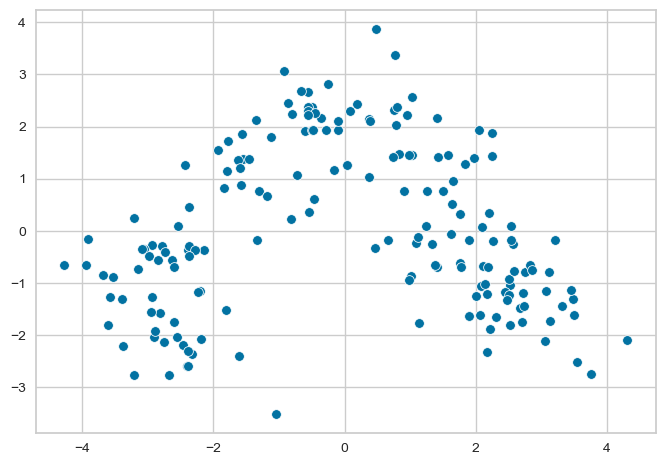

In [27]:
sns.scatterplot(
    x=feat_1,
    y=feat_2
)

### Plot Data In 3D Sctter Plot Using PCA

In [28]:
pca_3d = PCA(n_components=3, random_state=42)

In [29]:
three_dimentional_features = pca_3d.fit_transform(wine)
feat_1, feat_2, feat_3 = three_dimentional_features[:, 0], three_dimentional_features[:, 1], three_dimentional_features[:, 2]

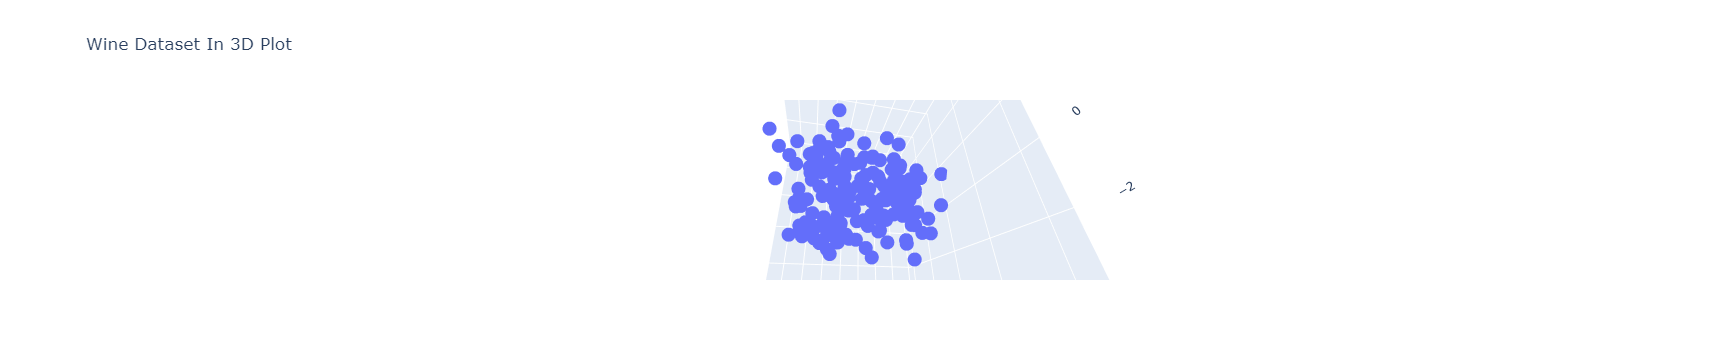

In [30]:
fig = px.scatter_3d(
    x=feat_1,
    y=feat_2,
    z=feat_3,
    title="Wine Dataset In 3D Plot"
)
fig.show()

# Kmeans Clustering

### Elbow Method
<p>
    <strong>Distortion</strong> is calculated as the <strong>average</strong> of the squared distances (let's say Euclidean distance) from the cluster centers of the respective clusters. <strong>Inertia</strong> represents the <strong>sum</strong> of squared distances of samples to their closest cluster center.
</p>

In [31]:
kmeans_model = KMeans(random_state=42)

In [32]:
visualizer = KElbowVisualizer(kmeans_model, k=(2,12))

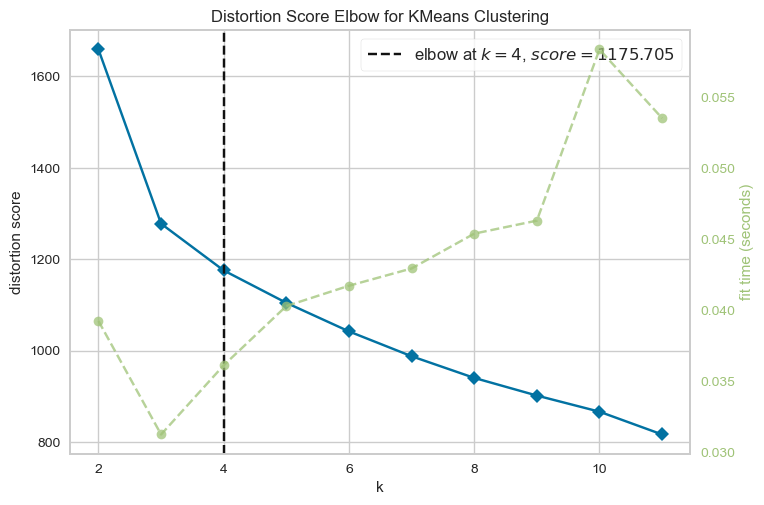

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
visualizer.fit(wine)       
visualizer.show()       

### Silhouette Visualizer

In [68]:
visualizer = KElbowVisualizer(kmeans_model, k=(2,12), metric='silhouette')

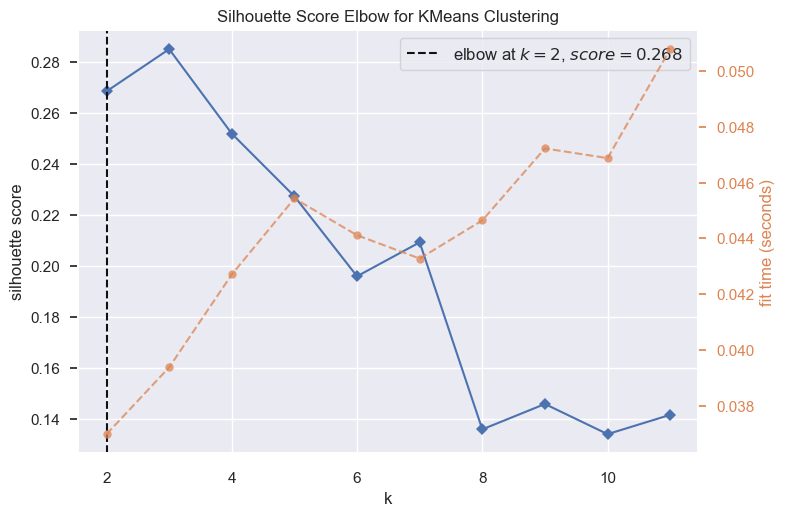

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [69]:
visualizer.fit(wine)       
visualizer.show()       

In [34]:
silhouette_scores = []
for i in range(2, 13):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(wine)
    score = silhouette_score(wine, model.labels_)
    silhouette_scores.append(score)

In [35]:
silhouette_scores

[0.26831340971052126,
 0.2848589191898987,
 0.25173343011696475,
 0.2271732547624458,
 0.19582485390848947,
 0.20913005310687274,
 0.13581656516941268,
 0.14576057110571292,
 0.13394527355239233,
 0.1415050320596543,
 0.1294401408551392]

<AxesSubplot:>

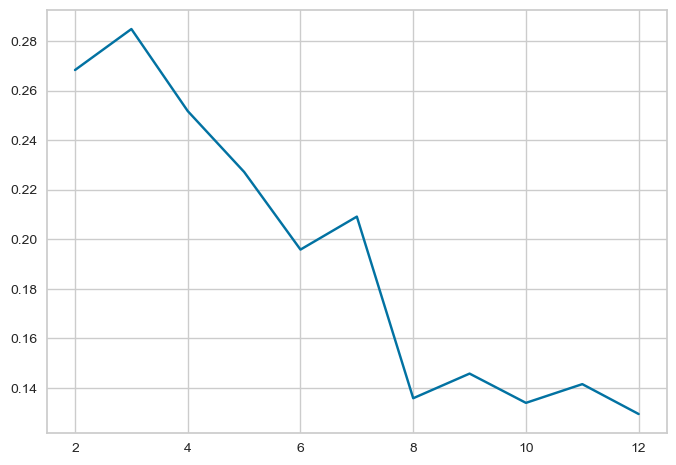

In [36]:
sns.lineplot(
    x=range(2,13),
    y=silhouette_scores
)

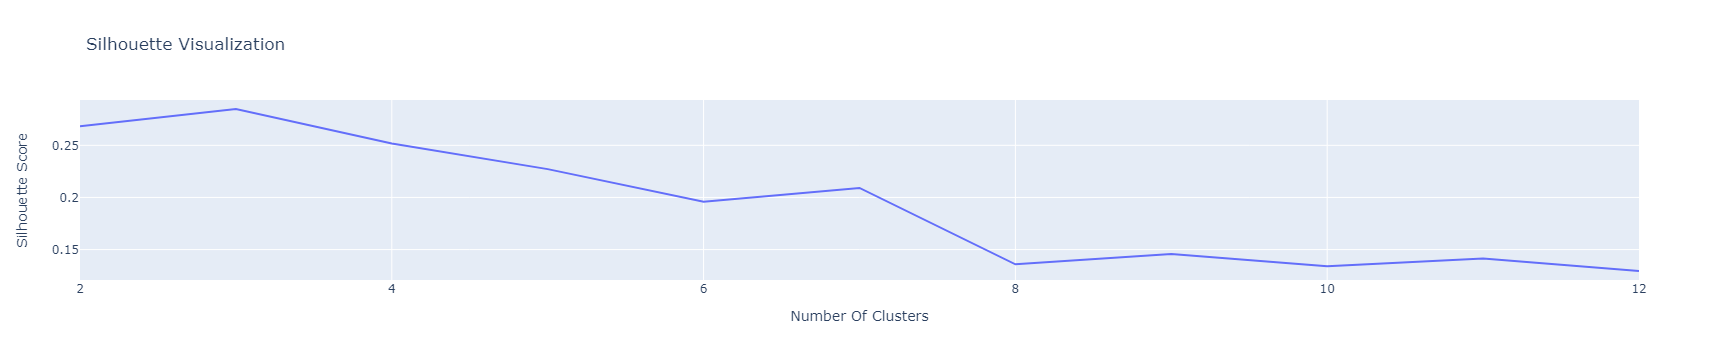

In [37]:
px.line(
    x=range(2,13),
    y=silhouette_scores,
    title='Silhouette Visualization'
).update_layout(
    xaxis_title='Number Of Clusters',
    yaxis_title='Silhouette Score'
)

For n_clusters = 2 The average silhouette_score is : 0.26831340971052126
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
For n_clusters = 4 The average silhouette_score is : 0.25173343011696475
For n_clusters = 5 The average silhouette_score is : 0.2271732547624458
For n_clusters = 6 The average silhouette_score is : 0.19582485390848947
For n_clusters = 7 The average silhouette_score is : 0.20913005310687274
For n_clusters = 8 The average silhouette_score is : 0.13581656516941268
For n_clusters = 9 The average silhouette_score is : 0.14576057110571292
For n_clusters = 10 The average silhouette_score is : 0.13394527355239233
For n_clusters = 11 The average silhouette_score is : 0.1415050320596543
For n_clusters = 12 The average silhouette_score is : 0.1294401408551392


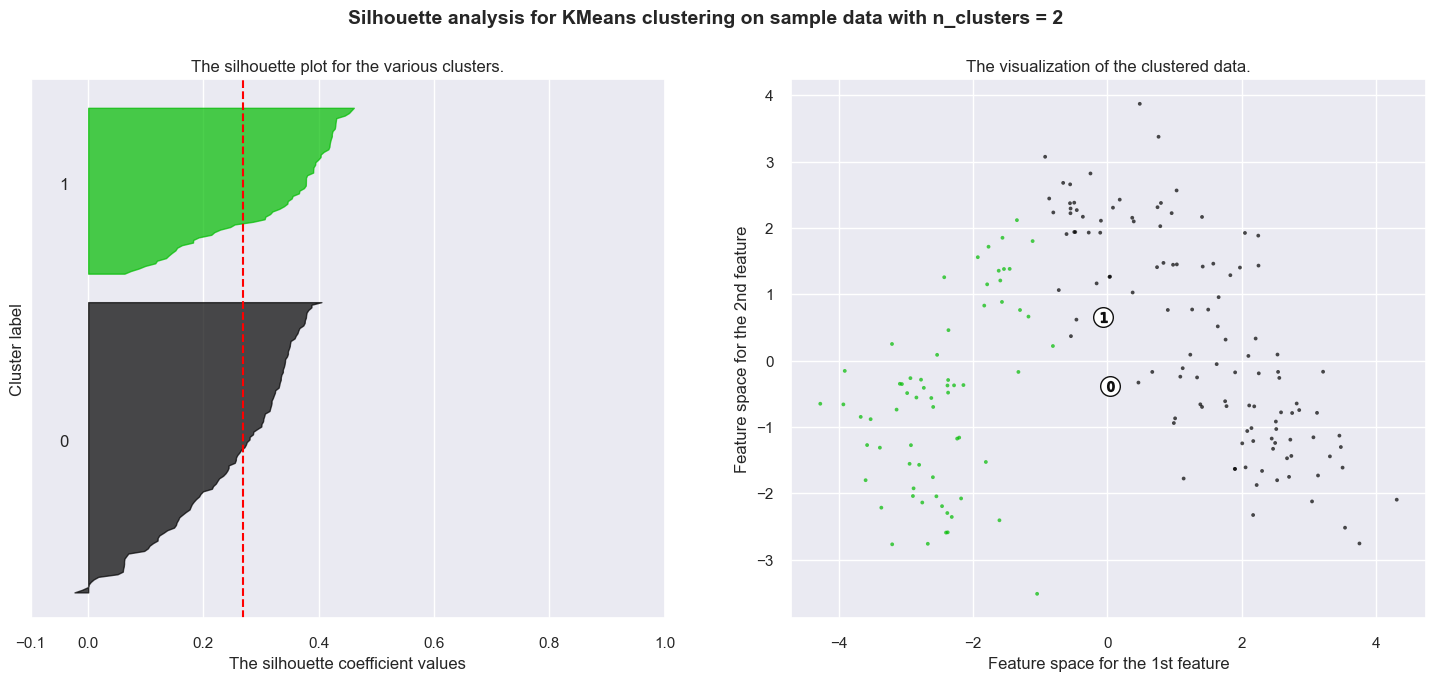

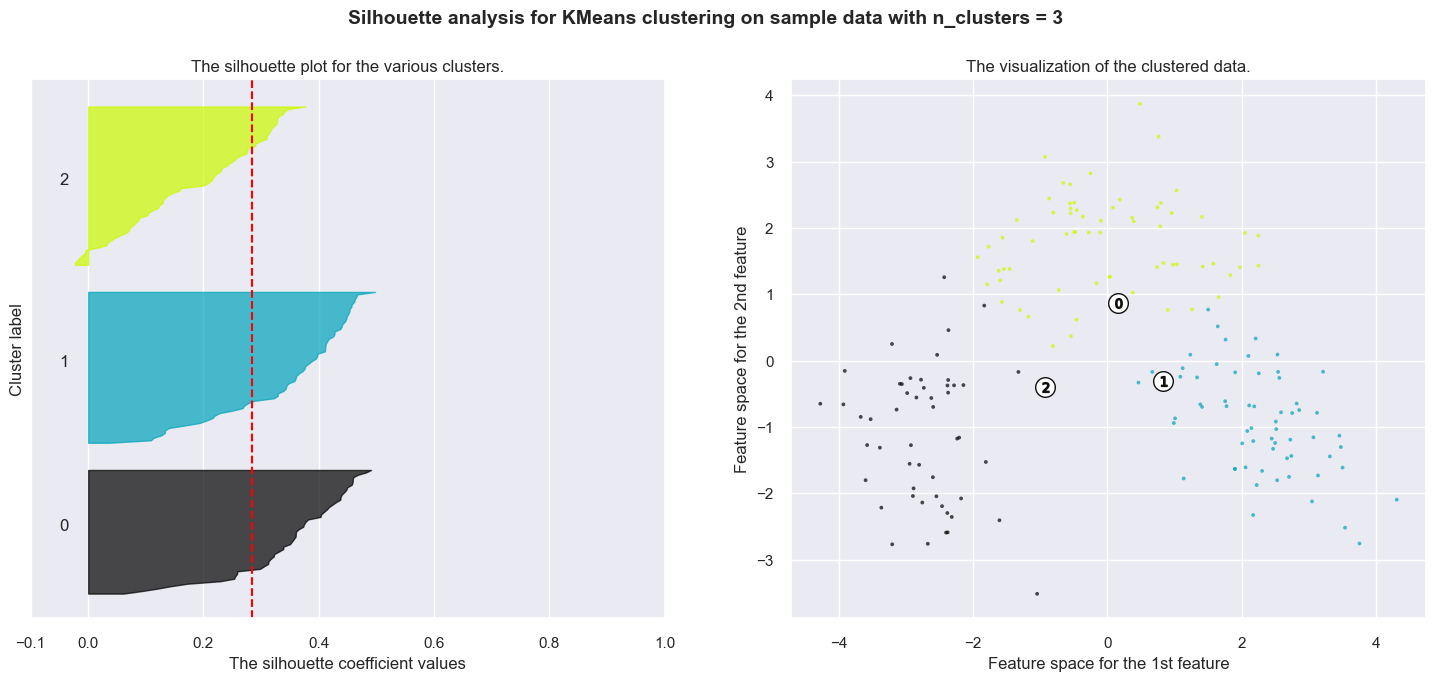

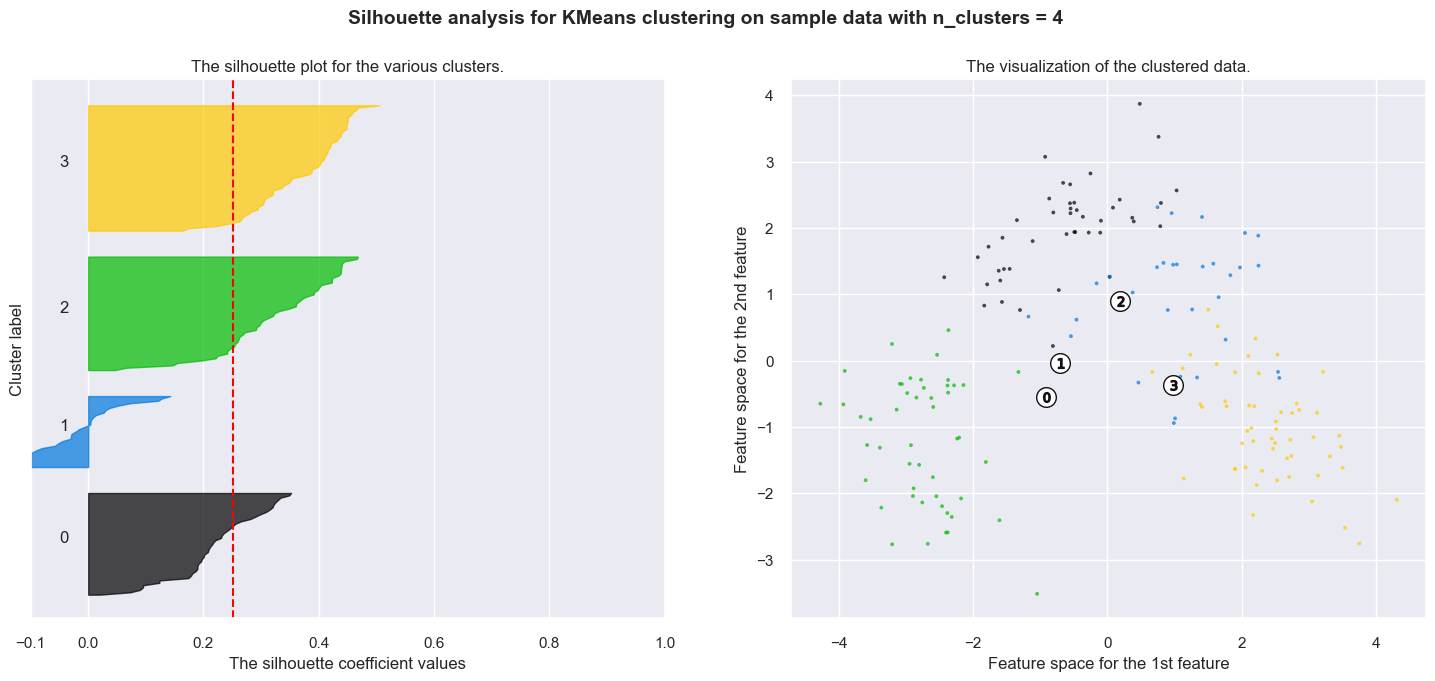

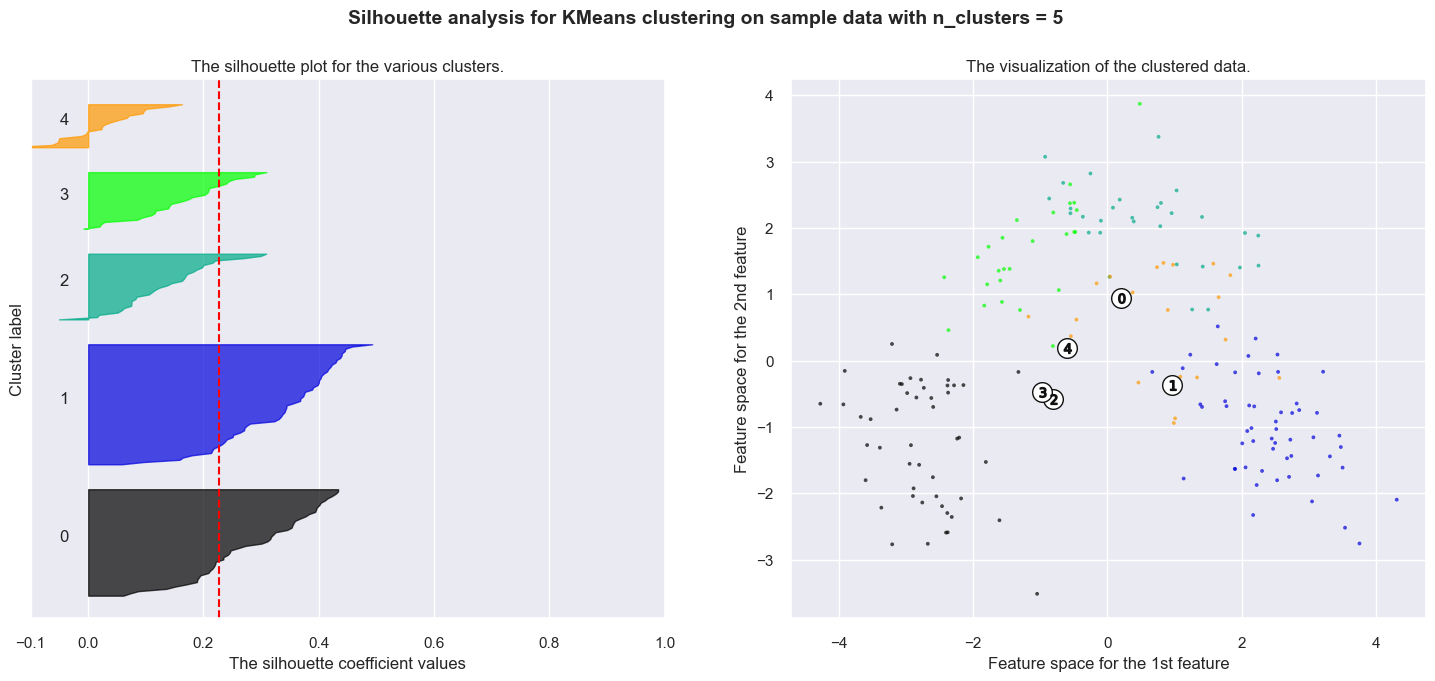

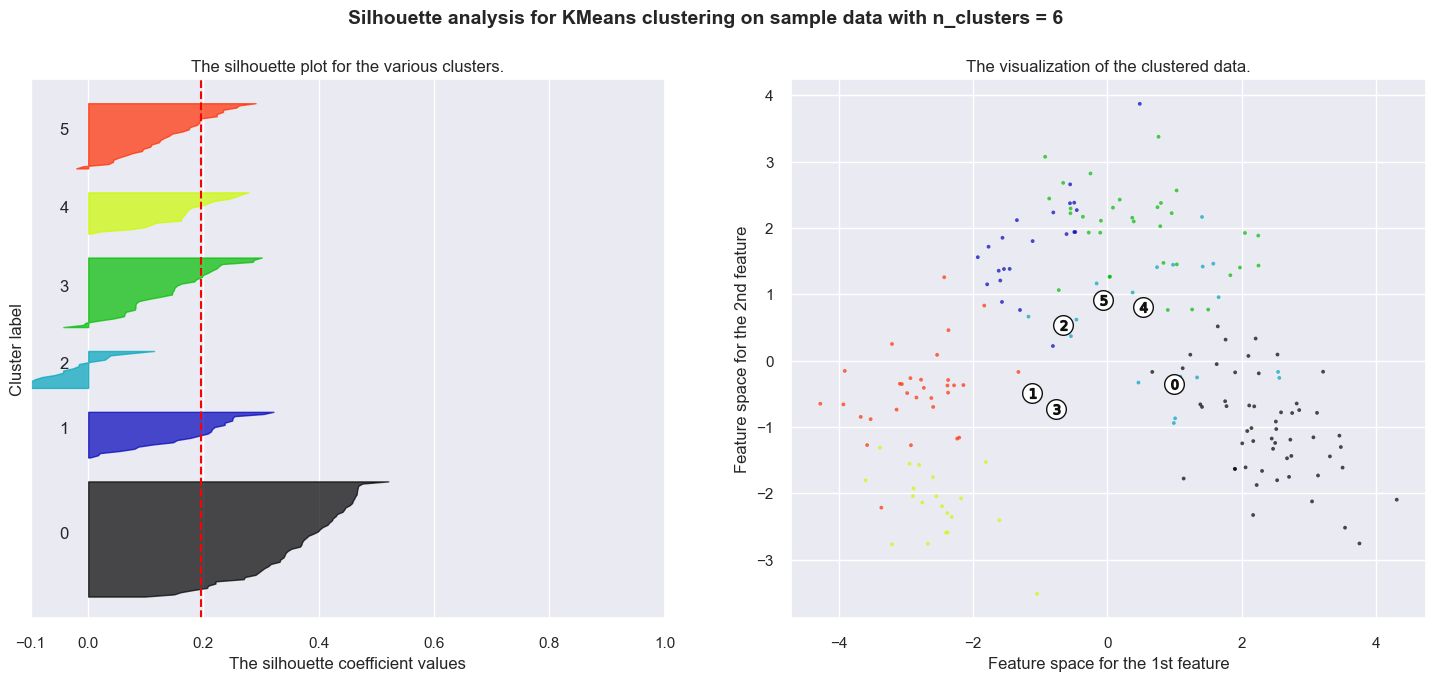

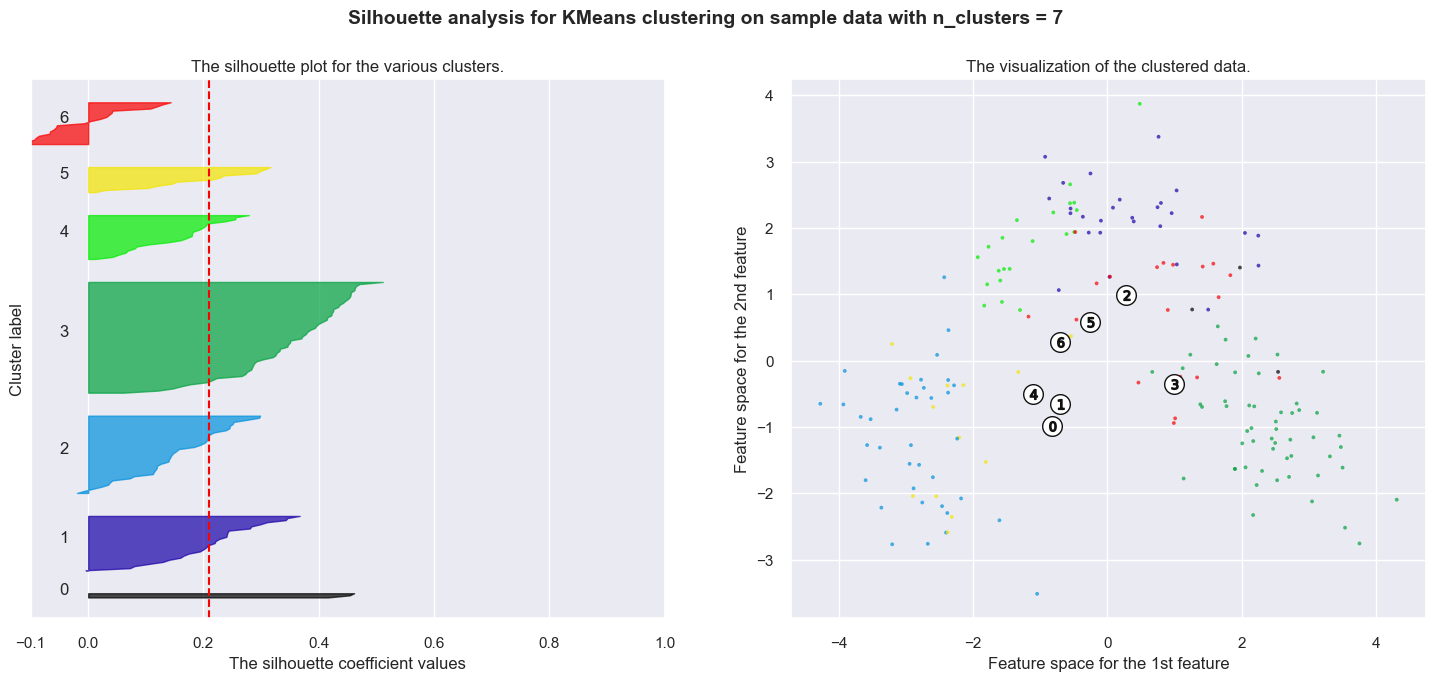

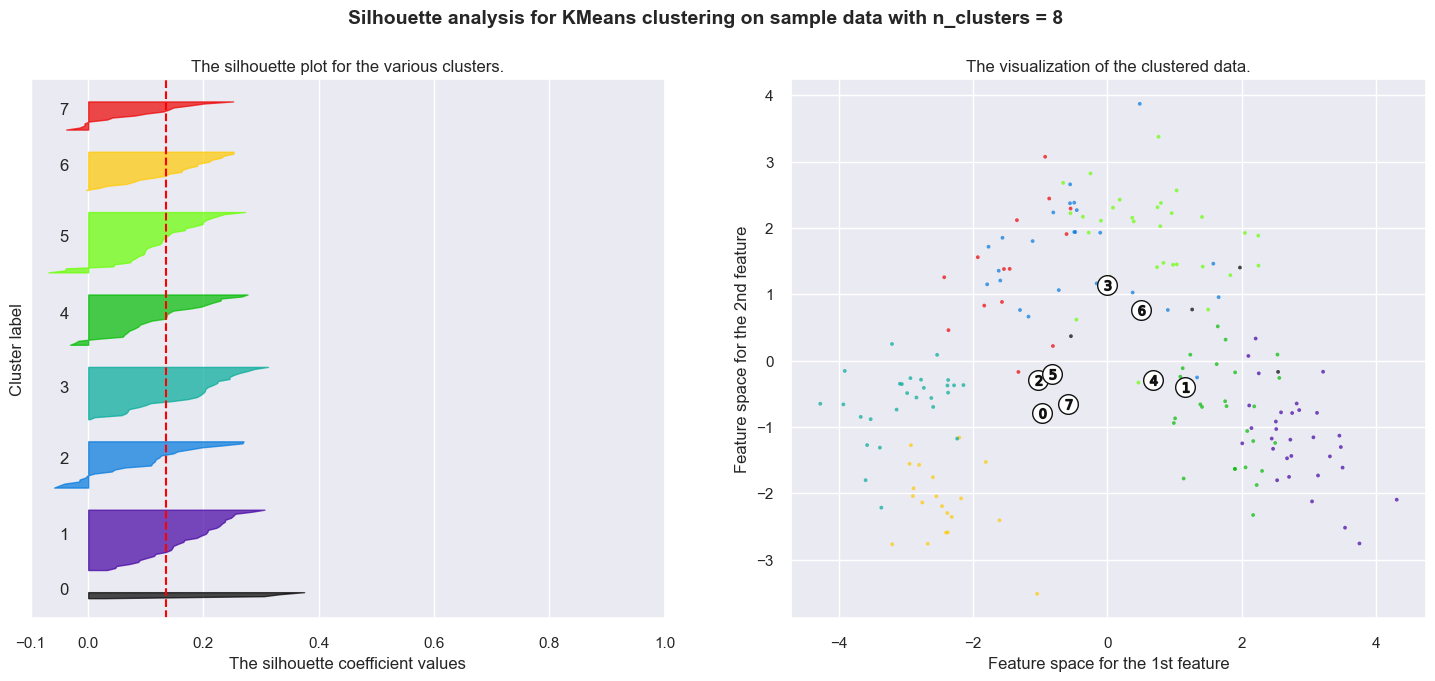

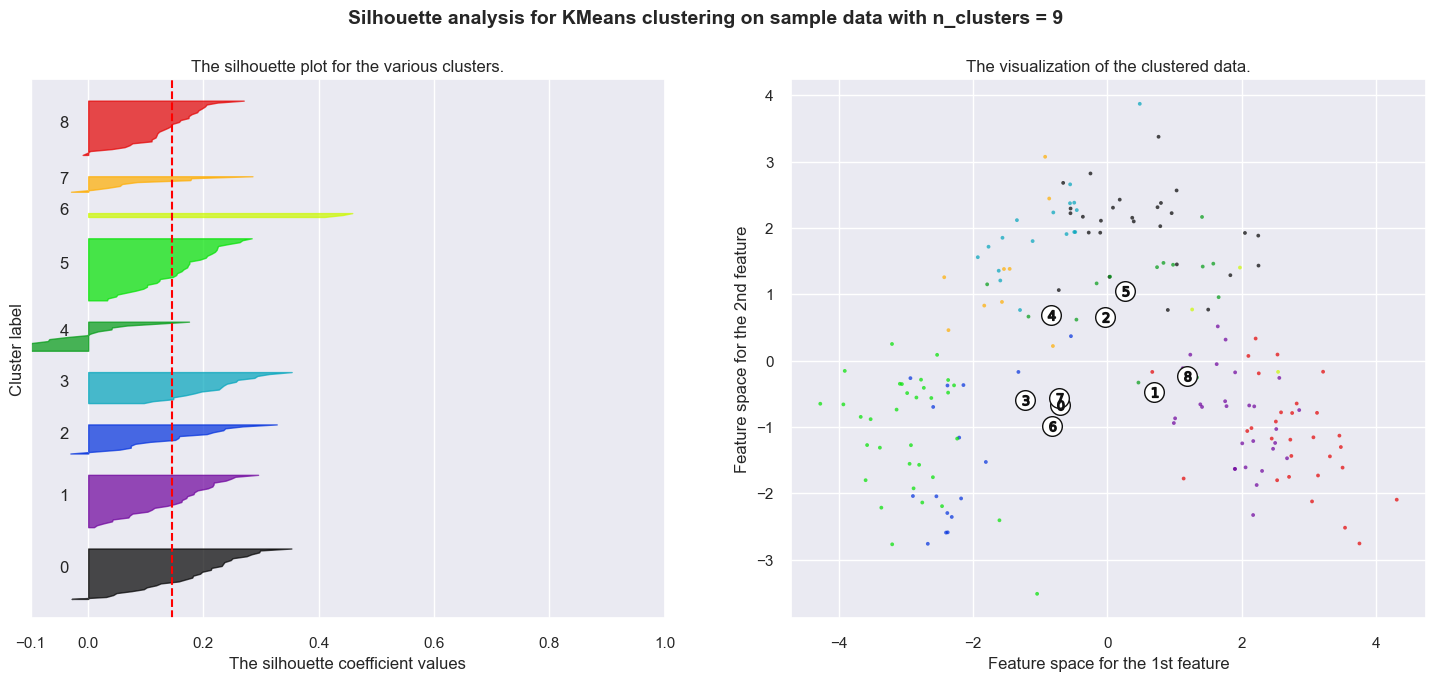

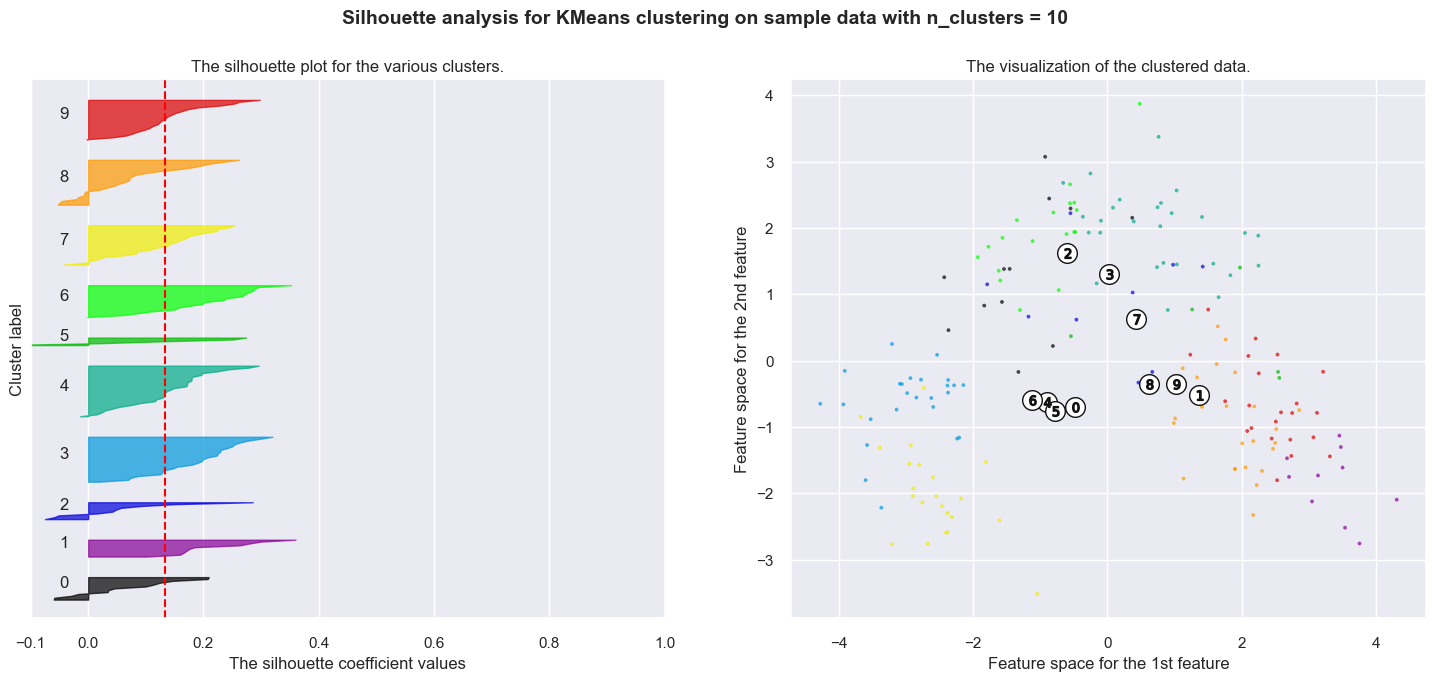

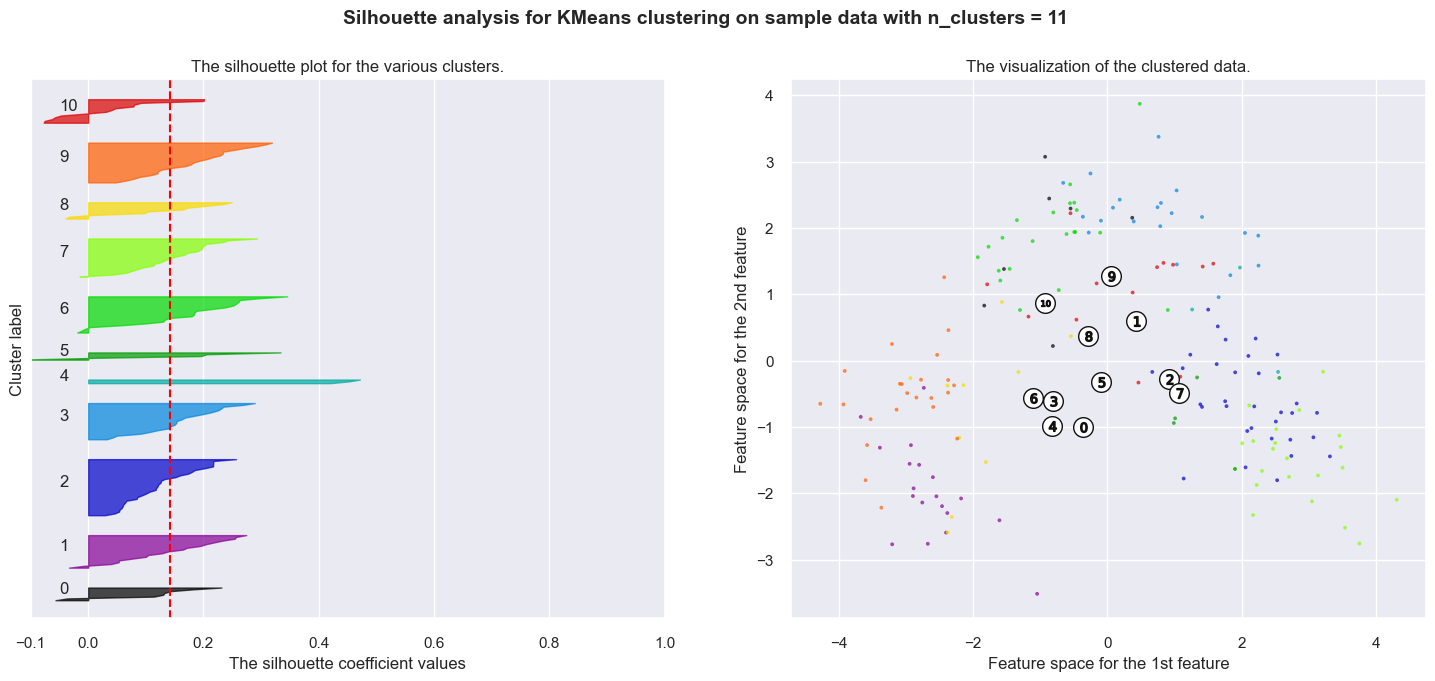

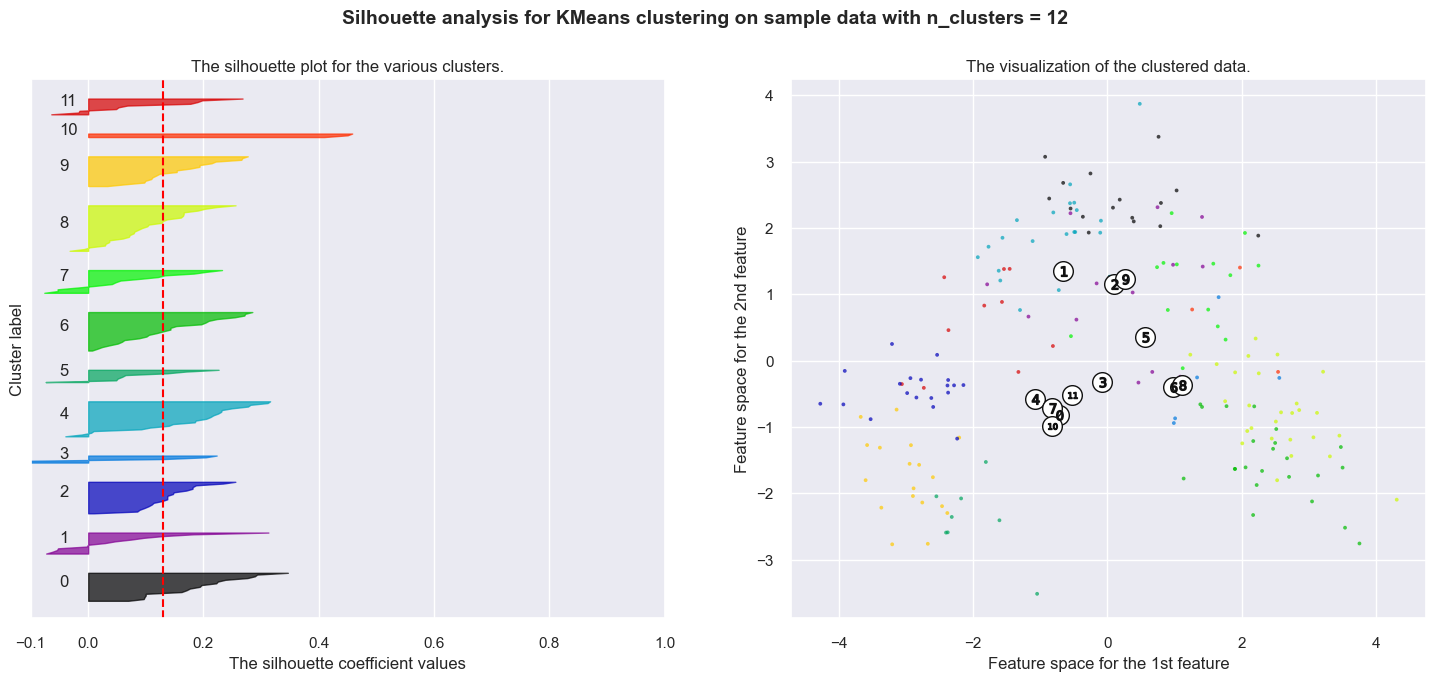

In [59]:
range_n_clusters = range(2, 13)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(wine) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer.fit(wine)
    cluster_labels = clusterer.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(wine, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(wine, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    pca = PCA(n_components=2, random_state=42)
    X = pca.fit_transform(wine)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Final KMeans Model With 4 Clusters

In [104]:
final_kmean_model = KMeans(n_clusters=4, random_state=42)

In [105]:
final_kmean_model.fit(wine_df)

KMeans(n_clusters=4, random_state=42)

In [106]:
final_kmean_model.labels_

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [107]:
final_kmean_model.inertia_

1337029.4929415903

# DBSCAN Clustering

In [174]:
dbscan_cluster_model = DBSCAN(eps=2, metric='euclidean', min_samples=6)

In [175]:
dbscan_cluster_model.fit(wine)

DBSCAN(eps=2, min_samples=6)

In [176]:
dbscan_cluster_model.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
        0,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  0, -1, -1, -1,  0,
        0,  0,  0, -1,  0,  1,  0, -1, -1,  0, -1,  1,  0, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1,  2, -1, -1, -1,  2, -1, -1,  2, -1, -1,
       -1, -1,  2, -1,  2, -1, -1, -1], dtype=int64)

In [177]:
pca = PCA(n_components=2, random_state=42)
two_d_features = pca.fit_transform(wine)

Text(0, 0.5, 'Feature 2')

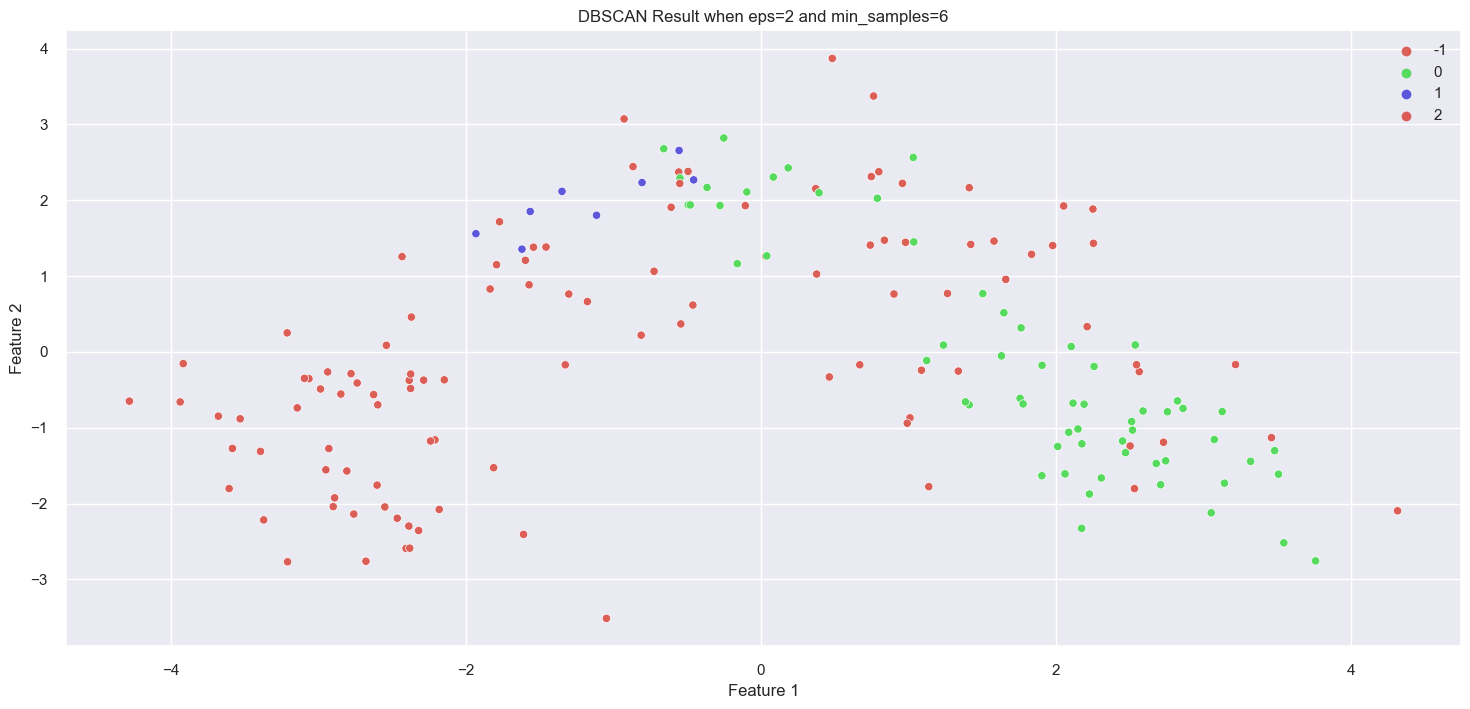

In [179]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    x=two_d_features[:, 0],
    y=two_d_features[:, 1],
    hue=dbscan_cluster_model.labels_,
    palette='hls'
)
plt.title("DBSCAN Result when eps=2 and min_samples=6")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")